In [1]:
#!pip install textblob

In [1]:
#import
import pandas as pd
import string
import re

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

import numpy as np

from datasets import Dataset
from transformers import DistilBertTokenizerFast
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import Trainer

from textblob import TextBlob

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, download
from nltk.tokenize import word_tokenize

# Download required resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hxtreme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hxtreme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hxtreme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hxtreme\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hxtreme\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\Hxtreme\Jupyter_Notebook_Learning\Final_Project\Dataset\Insurance_CFS.csv")
df.head()

,Review_ID,Customer_ID,Service_Type,Rating,Sentiment_Label,Review_Text
0,R100000,C50000,Customer Support,1,Negative,Unfriendly staff and long hold times.
1,R100001,C50001,Policy Purchase,5,Positive,Quick claim settlement. Totally impressed!
2,R100002,C50002,Policy Purchase,4,Positive,I'm happy with the insurance product and servi...
3,R100003,C50003,Policy Purchase,5,Positive,The policy purchase was seamless and easy to u...
4,R100004,C50004,Customer Support,2,Negative,Very poor service. No response for days.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review_ID        50000 non-null  object
 1   Customer_ID      50000 non-null  object
 2   Service_Type     50000 non-null  object
 3   Rating           50000 non-null  int64 
 4   Sentiment_Label  50000 non-null  object
 5   Review_Text      50000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


In [5]:
df.isnull().sum()

Review_ID          0
Customer_ID        0
Service_Type       0
Rating             0
Sentiment_Label    0
Review_Text        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns = df.columns.str.lower()
df.head()

,review_id,customer_id,service_type,rating,sentiment_label,review_text
0,R100000,C50000,Customer Support,1,Negative,Unfriendly staff and long hold times.
1,R100001,C50001,Policy Purchase,5,Positive,Quick claim settlement. Totally impressed!
2,R100002,C50002,Policy Purchase,4,Positive,I'm happy with the insurance product and servi...
3,R100003,C50003,Policy Purchase,5,Positive,The policy purchase was seamless and easy to u...
4,R100004,C50004,Customer Support,2,Negative,Very poor service. No response for days.


In [8]:
df = df.apply(lambda col: col.str.lower() if col.dtypes == 'object' else col)
df.head()

,review_id,customer_id,service_type,rating,sentiment_label,review_text
0,r100000,c50000,customer support,1,negative,unfriendly staff and long hold times.
1,r100001,c50001,policy purchase,5,positive,quick claim settlement. totally impressed!
2,r100002,c50002,policy purchase,4,positive,i'm happy with the insurance product and servi...
3,r100003,c50003,policy purchase,5,positive,the policy purchase was seamless and easy to u...
4,r100004,c50004,customer support,2,negative,very poor service. no response for days.


In [9]:
# Detect punctuation
def punctuation(text):
    return any(char in string.punctuation for char in text)

df['has_punctuation'] = df['review_text'].apply(punctuation)
df['has_punctuation'].value_counts()

has_punctuation
True    50000
Name: count, dtype: int64

In [10]:
# Remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['review_no_punctuation'] = df['review_text'].apply(remove_punctuation)
df.head()

,review_id,customer_id,service_type,rating,sentiment_label,review_text,has_punctuation,review_no_punctuation
0,r100000,c50000,customer support,1,negative,unfriendly staff and long hold times.,True,unfriendly staff and long hold times
1,r100001,c50001,policy purchase,5,positive,quick claim settlement. totally impressed!,True,quick claim settlement totally impressed
2,r100002,c50002,policy purchase,4,positive,i'm happy with the insurance product and servi...,True,im happy with the insurance product and services
3,r100003,c50003,policy purchase,5,positive,the policy purchase was seamless and easy to u...,True,the policy purchase was seamless and easy to u...
4,r100004,c50004,customer support,2,negative,very poor service. no response for days.,True,very poor service no response for days


In [11]:
stop_words = set(stopwords.words('english'))

In [12]:
# Detect stopwords
def stopwords(text):
    words = text.split()
    return any(word in stop_words for word in words)

df['has_stopwords'] = df['review_no_punctuation'].apply(stopwords)
df['has_stopwords'].value_counts()

has_stopwords
True     45988
False     4012
Name: count, dtype: int64

In [13]:
# Remove stopwords
def remove_stopwords(text):
    words = text.split()
    return ' '.join([word for word in words if word not in stop_words])

df['review_no_stopwords'] = df['review_no_punctuation'].apply(remove_stopwords)
df.head()

,review_id,customer_id,service_type,rating,sentiment_label,review_text,has_punctuation,review_no_punctuation,has_stopwords,review_no_stopwords
0,r100000,c50000,customer support,1,negative,unfriendly staff and long hold times.,True,unfriendly staff and long hold times,True,unfriendly staff long hold times
1,r100001,c50001,policy purchase,5,positive,quick claim settlement. totally impressed!,True,quick claim settlement totally impressed,False,quick claim settlement totally impressed
2,r100002,c50002,policy purchase,4,positive,i'm happy with the insurance product and servi...,True,im happy with the insurance product and services,True,im happy insurance product services
3,r100003,c50003,policy purchase,5,positive,the policy purchase was seamless and easy to u...,True,the policy purchase was seamless and easy to u...,True,policy purchase seamless easy understand
4,r100004,c50004,customer support,2,negative,very poor service. no response for days.,True,very poor service no response for days,True,poor service response days


In [14]:
# Detect URLs
def url(text):
    return bool(re.search(r'http[s]?://|www\.', text))

df['has_url'] = df['review_no_stopwords'].apply(url)
df['has_url'].value_counts()

has_url
False    50000
Name: count, dtype: int64

In [15]:
# Detect emojis
def emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))

df['has_emoji'] = df['review_no_stopwords'].apply(emoji)
df['has_emoji'].value_counts()

has_emoji
False    50000
Name: count, dtype: int64

In [16]:
df['cleaned_review']=df['review_no_stopwords']
df.head()

,review_id,customer_id,service_type,rating,sentiment_label,review_text,has_punctuation,review_no_punctuation,has_stopwords,review_no_stopwords,has_url,has_emoji,cleaned_review
0,r100000,c50000,customer support,1,negative,unfriendly staff and long hold times.,True,unfriendly staff and long hold times,True,unfriendly staff long hold times,False,False,unfriendly staff long hold times
1,r100001,c50001,policy purchase,5,positive,quick claim settlement. totally impressed!,True,quick claim settlement totally impressed,False,quick claim settlement totally impressed,False,False,quick claim settlement totally impressed
2,r100002,c50002,policy purchase,4,positive,i'm happy with the insurance product and servi...,True,im happy with the insurance product and services,True,im happy insurance product services,False,False,im happy insurance product services
3,r100003,c50003,policy purchase,5,positive,the policy purchase was seamless and easy to u...,True,the policy purchase was seamless and easy to u...,True,policy purchase seamless easy understand,False,False,policy purchase seamless easy understand
4,r100004,c50004,customer support,2,negative,very poor service. no response for days.,True,very poor service no response for days,True,poor service response days,False,False,poor service response days


In [17]:
#!pip install spacy
#!python -m spacy download en_core_web_sm


In [18]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Function to lemmatize text using spaCy
def spacy_lemmatize(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])


In [19]:
df["lemmatized_review"] = df["cleaned_review"].apply(spacy_lemmatize)


In [20]:
print(df[["review_text", "cleaned_review", "lemmatized_review"]].head())


                                         review_text  \
0              unfriendly staff and long hold times.   
1         quick claim settlement. totally impressed!   
2  i'm happy with the insurance product and servi...   
3  the policy purchase was seamless and easy to u...   
4           very poor service. no response for days.   

                             cleaned_review  \
0          unfriendly staff long hold times   
1  quick claim settlement totally impressed   
2       im happy insurance product services   
3  policy purchase seamless easy understand   
4                poor service response days   

                          lemmatized_review  
0           unfriendly staff long hold time  
1    quick claim settlement totally impress  
2       I m happy insurance product service  
3  policy purchase seamless easy understand  
4                 poor service response day  


In [21]:
# Tokenize the cleaned_review column using simple whitespace splitting
df['review_tokens'] = df['lemmatized_review'].apply(lambda x: x.split())
df.head()

,review_id,customer_id,service_type,rating,sentiment_label,review_text,has_punctuation,review_no_punctuation,has_stopwords,review_no_stopwords,has_url,has_emoji,cleaned_review,lemmatized_review,review_tokens
0,r100000,c50000,customer support,1,negative,unfriendly staff and long hold times.,True,unfriendly staff and long hold times,True,unfriendly staff long hold times,False,False,unfriendly staff long hold times,unfriendly staff long hold time,"[unfriendly, staff, long, hold, time]"
1,r100001,c50001,policy purchase,5,positive,quick claim settlement. totally impressed!,True,quick claim settlement totally impressed,False,quick claim settlement totally impressed,False,False,quick claim settlement totally impressed,quick claim settlement totally impress,"[quick, claim, settlement, totally, impress]"
2,r100002,c50002,policy purchase,4,positive,i'm happy with the insurance product and servi...,True,im happy with the insurance product and services,True,im happy insurance product services,False,False,im happy insurance product services,I m happy insurance product service,"[I, m, happy, insurance, product, service]"
3,r100003,c50003,policy purchase,5,positive,the policy purchase was seamless and easy to u...,True,the policy purchase was seamless and easy to u...,True,policy purchase seamless easy understand,False,False,policy purchase seamless easy understand,policy purchase seamless easy understand,"[policy, purchase, seamless, easy, understand]"
4,r100004,c50004,customer support,2,negative,very poor service. no response for days.,True,very poor service no response for days,True,poor service response days,False,False,poor service response days,poor service response day,"[poor, service, response, day]"


In [22]:
df['rating'].value_counts()

rating
3    12562
5    10120
4    10111
2     9766
1     7441
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   review_id              50000 non-null  object
 1   customer_id            50000 non-null  object
 2   service_type           50000 non-null  object
 3   rating                 50000 non-null  int64 
 4   sentiment_label        50000 non-null  object
 5   review_text            50000 non-null  object
 6   has_punctuation        50000 non-null  bool  
 7   review_no_punctuation  50000 non-null  object
 8   has_stopwords          50000 non-null  bool  
 9   review_no_stopwords    50000 non-null  object
 10  has_url                50000 non-null  bool  
 11  has_emoji              50000 non-null  bool  
 12  cleaned_review         50000 non-null  object
 13  lemmatized_review      50000 non-null  object
 14  review_tokens          50000 non-null  object
dtypes: bool(4), int64(1

In [24]:
# Function to map rating to sentiment
def map_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to create sentiment column
df['sentiment_label'] = df['rating'].apply(map_sentiment)
df.head()

,review_id,customer_id,service_type,rating,sentiment_label,review_text,has_punctuation,review_no_punctuation,has_stopwords,review_no_stopwords,has_url,has_emoji,cleaned_review,lemmatized_review,review_tokens
0,r100000,c50000,customer support,1,negative,unfriendly staff and long hold times.,True,unfriendly staff and long hold times,True,unfriendly staff long hold times,False,False,unfriendly staff long hold times,unfriendly staff long hold time,"[unfriendly, staff, long, hold, time]"
1,r100001,c50001,policy purchase,5,positive,quick claim settlement. totally impressed!,True,quick claim settlement totally impressed,False,quick claim settlement totally impressed,False,False,quick claim settlement totally impressed,quick claim settlement totally impress,"[quick, claim, settlement, totally, impress]"
2,r100002,c50002,policy purchase,4,positive,i'm happy with the insurance product and servi...,True,im happy with the insurance product and services,True,im happy insurance product services,False,False,im happy insurance product services,I m happy insurance product service,"[I, m, happy, insurance, product, service]"
3,r100003,c50003,policy purchase,5,positive,the policy purchase was seamless and easy to u...,True,the policy purchase was seamless and easy to u...,True,policy purchase seamless easy understand,False,False,policy purchase seamless easy understand,policy purchase seamless easy understand,"[policy, purchase, seamless, easy, understand]"
4,r100004,c50004,customer support,2,negative,very poor service. no response for days.,True,very poor service no response for days,True,poor service response days,False,False,poor service response days,poor service response day,"[poor, service, response, day]"


In [45]:
#EDA

<Axes: xlabel='rating', ylabel='count'>

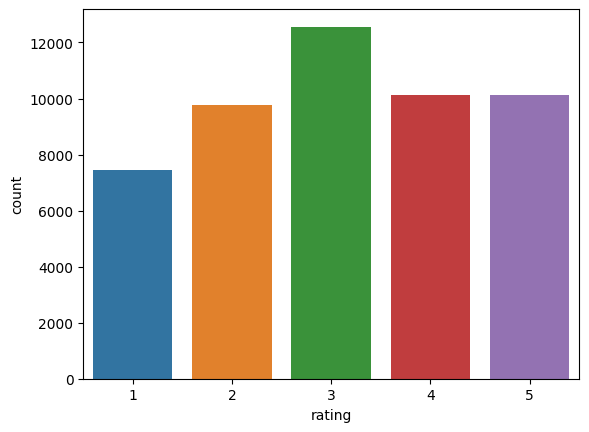

In [46]:
sns.countplot(x='rating', data=df)

<Axes: xlabel='sentiment_label', ylabel='count'>

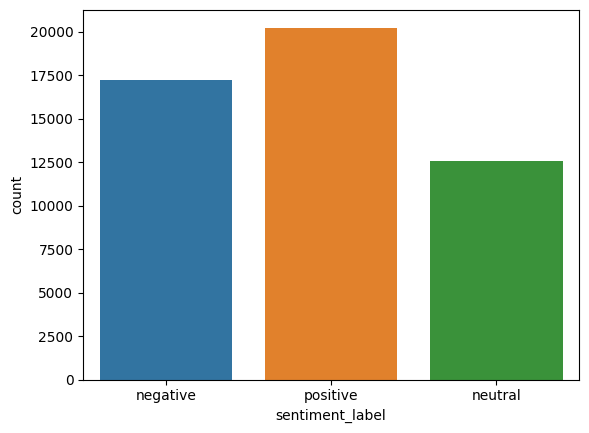

In [47]:
sns.countplot(x='sentiment_label', data=df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='review_length', ylabel='Count'>

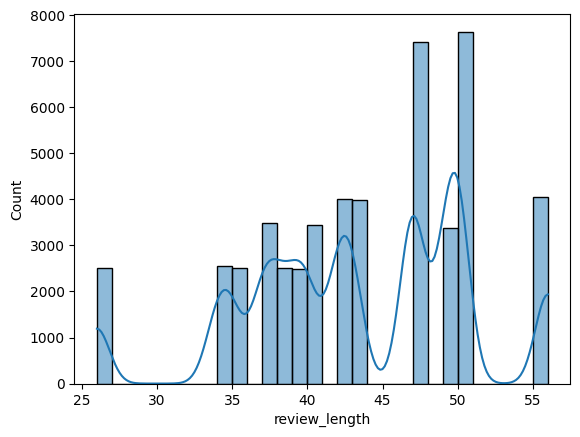

In [48]:
df["review_length"] = df["review_text"].apply(len)
sns.histplot(df['review_length'], bins=30, kde=True)

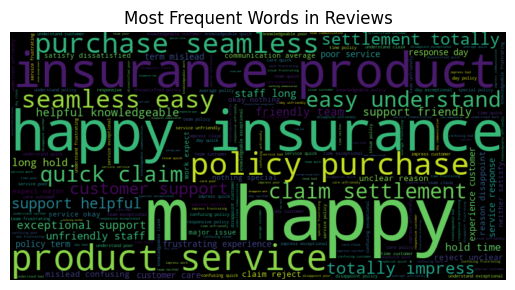

In [25]:
# Combine all cleaned reviews into one string
text = ' '.join(df['lemmatized_review'].dropna())

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Reviews")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


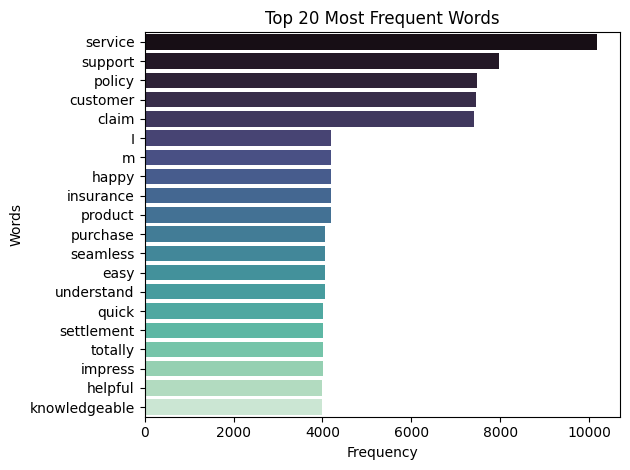

In [26]:
# Tokenize the cleaned reviews
all_tokens = ' '.join(df['lemmatized_review'].dropna()).split()

# Count word frequencies
word_freq = Counter(all_tokens)
common_words = word_freq.most_common(20)

# Create a bar plot
words, counts = zip(*common_words)
sns.barplot(x=list(counts), y=list(words), palette="mako")
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

In [27]:
# Function to generate and show word cloud
def show_wordcloud(data, sentiment):
    text = ' '.join(data.dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment.title()} Reviews")
    plt.show()

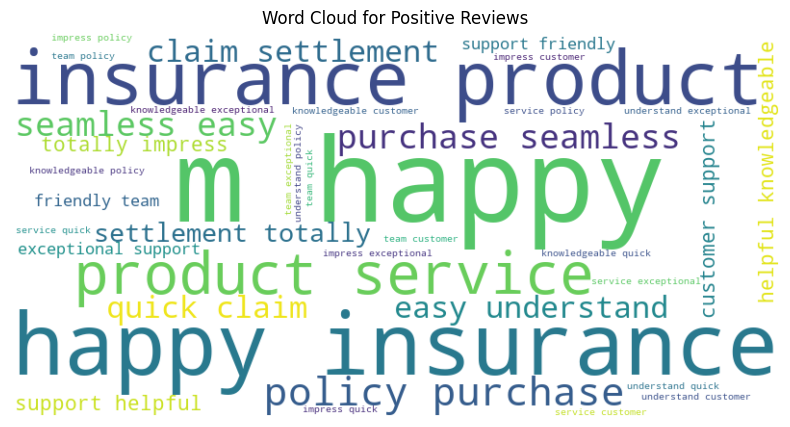

In [28]:
#Positive reviews
show_wordcloud(df[df['sentiment_label'] == 'positive']['lemmatized_review'], 'positive')

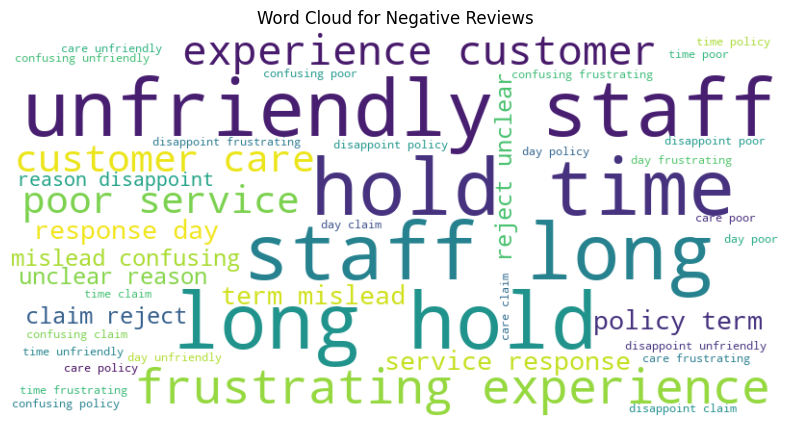

In [29]:
#Negative reviews
show_wordcloud(df[df['sentiment_label'] == 'negative']['lemmatized_review'], 'negative')

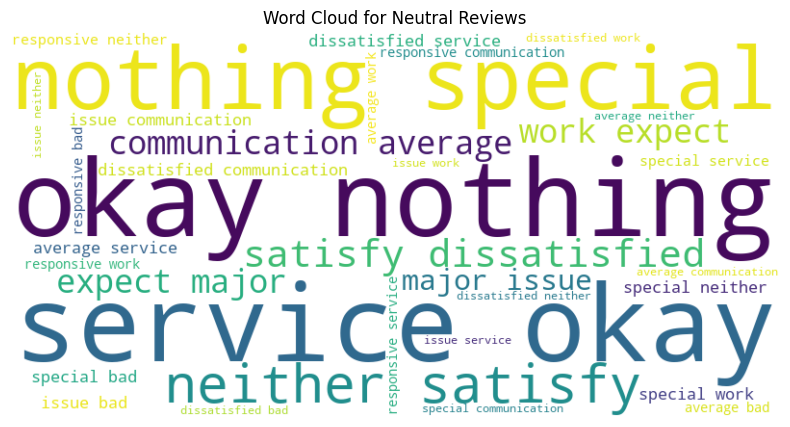

In [30]:
#Neutral reviews
show_wordcloud(df[df['sentiment_label'] == 'neutral']['lemmatized_review'], 'neutral')

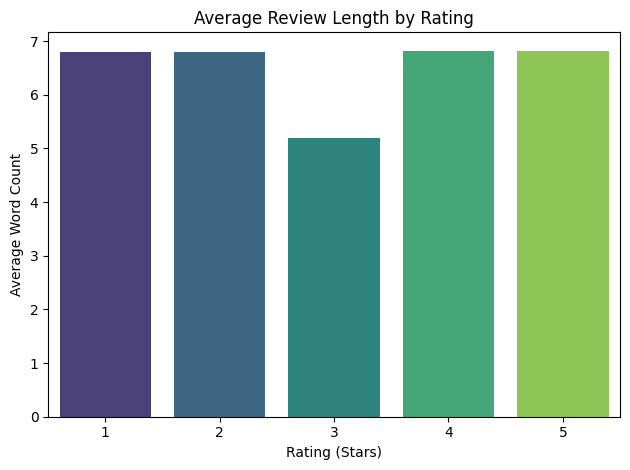

In [55]:
#8. What’s the average length of reviews per rating category?
# Calculate review length (in words) if not already present
df["review_length"] = df["review_text"].str.split().apply(len)

# Group by rating and get average review length
avg_length_by_rating = df.groupby("rating")["review_length"].mean().reset_index()

# Plot
sns.barplot(x="rating", y="review_length", data=avg_length_by_rating, palette="viridis")
plt.title("Average Review Length by Rating")
plt.xlabel("Rating (Stars)")
plt.ylabel("Average Word Count")
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


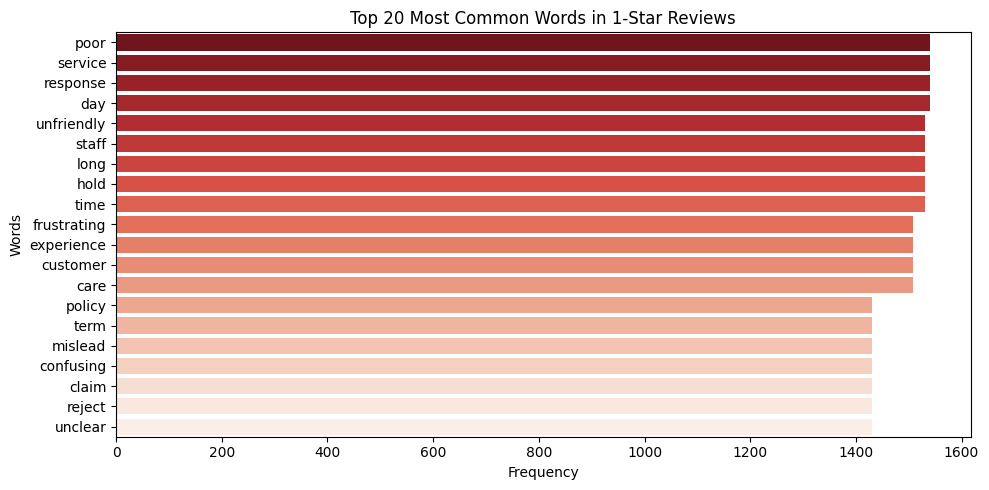

In [56]:
#9. What are the most mentioned words in 1-star reviews?
# Get 1-star reviews
one_star_reviews = df[df['rating'] == 1]['lemmatized_review'].dropna()

# Tokenize and flatten all words into one list
one_star_words = ' '.join(one_star_reviews).split()

# Count most common words
word_freq = Counter(one_star_words)
common_words = word_freq.most_common(20)

# Convert to DataFrame for plotting
words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), palette="Reds_r")
plt.title("Top 20 Most Common Words in 1-Star Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

In [31]:
# Create the DataFrame for BERT model
df_bert = df[['lemmatized_review', 'sentiment_label']].dropna().reset_index(drop=True)

In [32]:
# Encode sentiment to label (0 = negative, 1 = neutral, 2 = positive)
label_encoder = LabelEncoder()
df_bert['label'] = label_encoder.fit_transform(df_bert['sentiment_label'])

In [33]:
# Split before converting to Hugging Face dataset
train_df, test_df = train_test_split(df_bert, test_size=0.2, stratify=df_bert['label'], random_state=42)

In [34]:
# Convert to Hugging Face datasets
train_dataset = Dataset.from_pandas(train_df[['lemmatized_review', 'label']])
test_dataset = Dataset.from_pandas(test_df[['lemmatized_review', 'label']])

In [35]:
# Tokenize
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def tokenize(example):
    return tokenizer(example['lemmatized_review'], truncation=True, padding=True)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [36]:
sample_reviews = [
    # 🔹 POSITIVE
    "The claim was processed much faster than expected. Very smooth experience.",
    "Customer support was friendly and resolved my issue on the first call.",
    "Purchasing a policy through the app was seamless and quick!",
    "I’ve never had a better insurance experience. Highly recommended!",
    "Great transparency in the process. I felt well-informed throughout.",

    # 🔻 NEGATIVE
    "Horrible claim handling. Took weeks and no clear communication.",
    "I had to follow up multiple times just to get a response.",
    "The app crashed midway while I was buying a policy. Frustrating.",
    "Agent was rude and didn’t help with my issue at all.",
    "Policy document had errors and support didn’t respond timely.",

    # ⚪ NEUTRAL
    "It was okay. The process is not bad, but not impressive either.",
    "The chatbot helped a bit, but I still had to call customer care.",
    "Policy purchase is decent but could use more clarity.",
    "Average experience, nothing worth complaining or praising.",
    "Support was slow, but they eventually resolved the issue."
]

In [37]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_name = "cardiffnlp/twitter-roberta-base-sentiment"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Predict
results = sentiment_pipeline(sample_reviews)

# Map label ids to names
label_map = {0: "negative", 1: "neutral", 2: "positive"}

# Print predictions
for review, result in zip(sample_reviews, results):
    label_index = int(result['label'].split('_')[-1])
    sentiment = label_map[label_index]
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {result['score']:.2f})\n")

Device set to use cpu


Review: The claim was processed much faster than expected. Very smooth experience.
Predicted Sentiment: positive (Confidence: 0.95)

Review: Customer support was friendly and resolved my issue on the first call.
Predicted Sentiment: positive (Confidence: 0.90)

Review: Purchasing a policy through the app was seamless and quick!
Predicted Sentiment: positive (Confidence: 0.94)

Review: I’ve never had a better insurance experience. Highly recommended!
Predicted Sentiment: positive (Confidence: 0.97)

Review: Great transparency in the process. I felt well-informed throughout.
Predicted Sentiment: positive (Confidence: 0.95)

Review: Horrible claim handling. Took weeks and no clear communication.
Predicted Sentiment: negative (Confidence: 0.95)

Review: I had to follow up multiple times just to get a response.
Predicted Sentiment: neutral (Confidence: 0.62)

Review: The app crashed midway while I was buying a policy. Frustrating.
Predicted Sentiment: negative (Confidence: 0.96)

Review: Ag

In [38]:
for review, result in zip(sample_reviews, results):
    label_id = int(result['label'].split('_')[-1])
    sentiment = label_map[label_id]
    confidence = result['score']
    print(f"📝 Review: {review}")
    print(f"🔍 Predicted Sentiment: {sentiment.upper()} (Confidence: {confidence:.2%})\n")

📝 Review: The claim was processed much faster than expected. Very smooth experience.
🔍 Predicted Sentiment: POSITIVE (Confidence: 95.37%)

📝 Review: Customer support was friendly and resolved my issue on the first call.
🔍 Predicted Sentiment: POSITIVE (Confidence: 89.96%)

📝 Review: Purchasing a policy through the app was seamless and quick!
🔍 Predicted Sentiment: POSITIVE (Confidence: 93.66%)

📝 Review: I’ve never had a better insurance experience. Highly recommended!
🔍 Predicted Sentiment: POSITIVE (Confidence: 97.05%)

📝 Review: Great transparency in the process. I felt well-informed throughout.
🔍 Predicted Sentiment: POSITIVE (Confidence: 94.88%)

📝 Review: Horrible claim handling. Took weeks and no clear communication.
🔍 Predicted Sentiment: NEGATIVE (Confidence: 95.41%)

📝 Review: I had to follow up multiple times just to get a response.
🔍 Predicted Sentiment: NEUTRAL (Confidence: 61.63%)

📝 Review: The app crashed midway while I was buying a policy. Frustrating.
🔍 Predicted Sent

In [39]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load pre-trained CardiffNLP model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Save to your models folder
save_path = r"C:\Users\Hxtreme\Jupyter_Notebook_Learning\Final_Project\models\saved_sentiment_cardiff"
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

print("✅ CardiffNLP sentiment model saved to models folder successfully!")

✅ CardiffNLP sentiment model saved to models folder successfully!
